<a href="https://colab.research.google.com/github/HackerJacky/TimeSeriesColab/blob/main/TS_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import yfinance as yf
from scipy import stats
from google.colab import drive
import matplotlib.pyplot as plt


In [3]:
#擷取資料
sp500=yf.download('^GSPC',start='2018-01-01',end='2025-03-31')
sp500=sp500[['Close']]
#計算 log return
sp500['ret_sp500']=np.log(sp500).diff().dropna()
#EPU選擇美國,澳洲,法國,新加坡,巴西
EPU=pd.read_excel('/content/All_Country_Data.xlsx',usecols=['Year','Month','Australia','Brazil','France','US','Singapore'])
sp500.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,ret_sp500
Ticker,^GSPC,
Date,,
2018-01-02,2695.810059,NaN
2018-01-03,2713.060059,0.006378
2018-01-04,2723.989990,0.004021
2018-01-05,2743.149902,0.007009
2018-01-08,2747.709961,0.001661


In [4]:
#將S&P500從日資料換成月資料
sp500.index = pd.to_datetime(sp500.index)
monthly_sp500 = sp500['ret_sp500'].resample('ME').sum()
monthly_sp500.head()

,ret_sp500
Date,
2018-01-31,0.046388
2018-02-28,-0.039726
2018-03-31,-0.027252
2018-04-30,0.002715
2018-05-31,0.021378


In [5]:
data=pd.read_csv('/content/monthly_ret_sp500.csv')
data.index=pd.to_datetime(data['Date'])
data.head()

,Date,ret_sp500,Australia,Brazil,France,Singapore,US
Date,,,,,,,
2018-01-31,2018/1/31,0.046388,48.901424,165.005041,221.137569,146.146055,160.967205
2018-02-28,2018/2/28,-0.039726,67.914075,68.463581,192.030587,122.308889,114.755558
2018-03-31,2018/3/31,-0.027252,84.093319,101.205300,195.572139,168.097881,187.095890
2018-04-30,2018/4/30,0.002715,48.264544,152.250952,187.361105,156.113780,139.035386
2018-05-31,2018/5/31,0.021378,75.622559,179.808920,303.053908,176.825324,162.276697


In [6]:
for country in ['Australia', 'Brazil', 'France', 'Singapore', 'US']:
    data[f'{country}_pct'] = data[country].pct_change()
    for lag in range(1, 4):
        data[f'{country}_pct_lag{lag}'] = data[country].pct_change().shift(lag)


for i in range(1, 4):
    data[f'sp500_lag{i}'] = data['ret_sp500'].shift(i)

data.head()

,Date,ret_sp500,Australia,Brazil,France,Singapore,US,Australia_pct,Australia_pct_lag1,Australia_pct_lag2,...,Singapore_pct_lag1,Singapore_pct_lag2,Singapore_pct_lag3,US_pct,US_pct_lag1,US_pct_lag2,US_pct_lag3,sp500_lag1,sp500_lag2,sp500_lag3
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,2018/1/31,0.046388,48.901424,165.005041,221.137569,146.146055,160.967205,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,2018/2/28,-0.039726,67.914075,68.463581,192.030587,122.308889,114.755558,0.388795,NaN,NaN,...,NaN,NaN,NaN,-0.287087,NaN,NaN,NaN,0.046388,NaN,NaN
2018-03-31,2018/3/31,-0.027252,84.093319,101.205300,195.572139,168.097881,187.095890,0.238231,0.388795,NaN,...,-0.163105,NaN,NaN,0.630386,-0.287087,NaN,NaN,-0.039726,0.046388,NaN
2018-04-30,2018/4/30,0.002715,48.264544,152.250952,187.361105,156.113780,139.035386,-0.426060,0.238231,0.388795,...,0.374372,-0.163105,NaN,-0.256876,0.630386,-0.287087,NaN,-0.027252,-0.039726,0.046388
2018-05-31,2018/5/31,0.021378,75.622559,179.808920,303.053908,176.825324,162.276697,0.566835,-0.426060,0.238231,...,-0.071292,0.374372,-0.163105,0.167161,-0.256876,0.630386,-0.287087,0.002715,-0.027252,-0.039726


使用模型

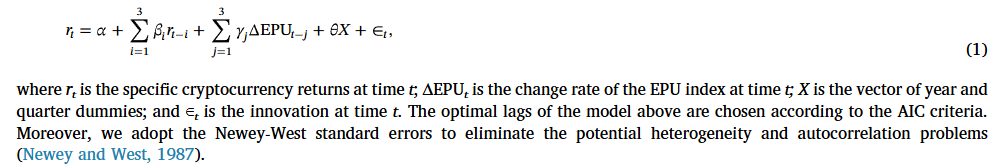

In [7]:
y=data['ret_sp500']
X=data[['Australia_pct_lag1','Australia_pct_lag2','Australia_pct_lag3','sp500_lag1','sp500_lag2','sp500_lag3']]
x=sm.add_constant(X)
model=sm.OLS(y,x,missing='drop').fit()
print(model.summary())
#澳洲整體數據不顯著

                            OLS Regression Results                            
Dep. Variable:              ret_sp500   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.6316
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.705
Time:                        05:01:11   Log-Likelihood:                 133.31
No. Observations:                  83   AIC:                            -252.6
Df Residuals:                      76   BIC:                            -235.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0139      0

In [8]:
y=data['ret_sp500']
X=data[['Brazil_pct_lag1','Brazil_pct_lag2','Brazil_pct_lag3','sp500_lag1','sp500_lag2','sp500_lag3']]
x=sm.add_constant(X)
model=sm.OLS(y,x,missing='drop').fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ret_sp500   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.8580
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.530
Time:                        05:01:14   Log-Likelihood:                 134.01
No. Observations:                  83   AIC:                            -254.0
Df Residuals:                      76   BIC:                            -237.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0123      0.007     

In [9]:
y=data['ret_sp500']
X=data[['France_pct_lag1','France_pct_lag2','France_pct_lag3','sp500_lag1','sp500_lag2','sp500_lag3']]
x=sm.add_constant(X)
model=sm.OLS(y,x,missing='drop').fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ret_sp500   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.7597
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.604
Time:                        05:01:16   Log-Likelihood:                 133.70
No. Observations:                  83   AIC:                            -253.4
Df Residuals:                      76   BIC:                            -236.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0097      0.006     

In [10]:
y=data['ret_sp500']
X=data[['US_pct_lag1','US_pct_lag2','US_pct_lag3','sp500_lag1','sp500_lag2','sp500_lag3']]
x=sm.add_constant(X)
model=sm.OLS(y,x,missing='drop').fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ret_sp500   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.6018
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.728
Time:                        05:01:18   Log-Likelihood:                 133.21
No. Observations:                  83   AIC:                            -252.4
Df Residuals:                      76   BIC:                            -235.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0109      0.007      1.595      

In [16]:
y=data['ret_sp500']
X=data[['Singapore_pct_lag1','Singapore_pct_lag2','Singapore_pct_lag3','sp500_lag1','sp500_lag2','sp500_lag3']]
x=sm.add_constant(X)
model=sm.OLS(y,x,missing='drop').fit()
print(model.summary())
#

                            OLS Regression Results                            
Dep. Variable:              ret_sp500   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.174
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.329
Time:                        05:05:08   Log-Likelihood:                 134.97
No. Observations:                  83   AIC:                            -255.9
Df Residuals:                      76   BIC:                            -239.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0149      0

In [20]:
#2022年3月全球經濟不確定性上升(包含供應鏈中斷,2月底爆發俄烏戰爭,能源價格上漲),導致新加坡的EPU上升,也是資料當中變動率最大的一個月份
data['Date'] = pd.to_datetime(data['Date'])  # ← 關鍵！先轉換格式

data['dummy_2022_03'] = (data['Date'].dt.year == 2022) & (data['Date'].dt.month == 3)
data['dummy_2022_03'] = data['dummy_2022_03'].astype(int)

# 移除 NA
df_model = data.dropna().copy()

# 定義 y 與 X
import statsmodels.api as sm

y = df_model['ret_sp500']
X = df_model[['sp500_lag1', 'sp500_lag2', 'sp500_lag3','Singapore_pct_lag1', 'Singapore_pct_lag2', 'Singapore_pct_lag3','dummy_2022_03']]
X = sm.add_constant(X)

# 建模 Newey-West robust standard errors
model = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 3})

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ret_sp500   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                     5.467
Date:                Wed, 28 May 2025   Prob (F-statistic):           4.23e-05
Time:                        05:30:42   Log-Likelihood:                 134.99
No. Observations:                  83   AIC:                            -254.0
Df Residuals:                      75   BIC:                            -234.6
Df Model:                           7                                         
Covariance Type:                  HAC                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0146      0.006      2.392      0.017       0.003       0.027
sp500_lag1            -0.1881      0.101     -1.867      0.062      -0.386       0.009
sp500_lag2            -0.1342      0.094     -1.426      0.154      -0.319       0.050
sp500_lag3             0.0027      0.102      0.027      0.979      -0.197       0.203
Singapore_pct_lag1    -0.0088      0.043     -0.207      0.836      -0.092       0.075
Singapore_pct_lag2    -0.0242      0.027     -0.890      0.373      -0.077       0.029
Singapore_pct_lag3    -0.0557      0.025     -2.208      0.027      -0.105      -0.006
dummy_2022_03          0.0103      0.018      0.562      0.574      -0.026       0.046
==============================================================================
Omnibus:                       15.061   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.769
Skew:                          -1.012   Prob(JB):                     0.000228
Kurtosis:                       3.869   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 3 lags and without small sample correction
"""